In [15]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
%matplotlib inline

In [3]:
#画决策边界的函数
def plot_decision_regions(X,y,classifier, test_idx=None, resolution=0.02):
    #setup marker generator adn color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    print Z.shape
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

    #highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c=cmap(3), alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

## 感知器分类算法

In [4]:
#读取样本数据，并划分成训练集和测试集
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [5]:
#对特征进行缩放，用于提高感知器性能
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

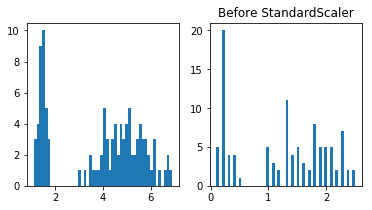

In [9]:
#对比进行特征缩放前和特征缩放后数据集的分布图
fig = plt.figure(figsize=(6,3))
ax3 = fig.add_subplot(121)
plt.hist(X_train[:,0], bins=50)
ax4 = fig.add_subplot(122)
plt.hist(X_train[:,1], bins=50)
plt.title(u'Before StandardScaler')
plt.show()

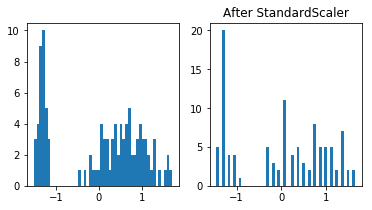

In [10]:
#缩放后的分布图
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(121)
plt.hist(X_train_std[:,0], bins=50)
ax2 = fig.add_subplot(122)
plt.hist(X_train_std[:,1], bins=50)
plt.title(u'After StandardScaler')

In [11]:
#使用sklearn库创建感知器模型
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [12]:
#预测并输出误分类样本数
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [13]:
#输出模型的准确率
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


[0 1 2]
(255, 265)


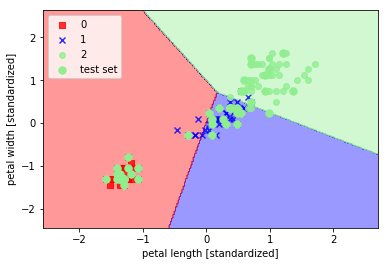

In [16]:
#画出模型的决策边界
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
print np.unique(y_test)
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')